# EDA ,DATA CLEANING DRAFT

In [50]:
#####Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns
import re
import nltk


import warnings
warnings.filterwarnings('ignore')

In [51]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test_with_no_labels.csv")

In [52]:
column_titles = [col for col in train_df.columns if col!= 'sentiment'] + ['sentiment']
train_df = train_df.reindex(columns=column_titles)

In [53]:
##view your data
train_df.head()

,message,tweetid,sentiment
0,PolySciMajor EPA chief doesn't think carbon di...,625221,1
1,It's not like we lack evidence of anthropogeni...,126103,1
2,RT @RawStory: Researchers say we have three ye...,698562,2
3,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,1
4,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,1


# Performing EXPLORATORY DATA ANALYSIS

In [54]:
#look at column names
train_df.columns

Index(['message', 'tweetid', 'sentiment'], dtype='object')

In [55]:
##look at how many rows and features our data contains
train_df.shape

(15819, 3)

In [56]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   message    15819 non-null  object
 1   tweetid    15819 non-null  int64 
 2   sentiment  15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [57]:
##for formalities lets look at null values
train_df.isnull().sum()

message      0
tweetid      0
sentiment    0
dtype: int64

In [58]:
##see statistics for non-numerical columns
train_df.describe(include=['object'])

,message
count,15819
unique,14229
top,RT @StephenSchlegel: she's thinking about how ...
freq,307


In [59]:
##see statistics for categorical features
train_df['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

In [60]:
##See percentage for categorical features
train_df['sentiment'].value_counts(normalize = True) * 100

 1    53.922498
 2    23.010304
 0    14.874518
-1     8.192680
Name: sentiment, dtype: float64

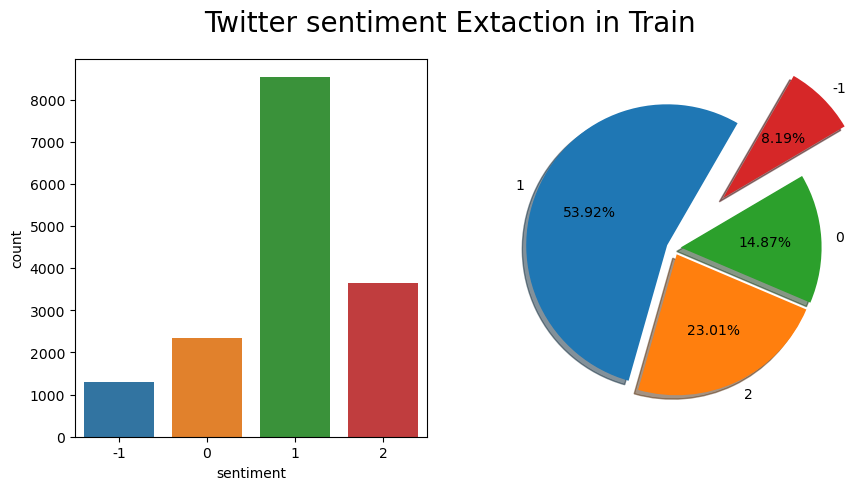

In [61]:

# Displaying target distribution.

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10, 5), dpi=100)
sns.countplot(train_df['sentiment'], ax=axes[0])
axes[1].pie(train_df['sentiment'].value_counts(),
            labels=['1', '2', '0','-1'],
            autopct='%1.2f%%',
            shadow=True,
            explode=(0.05, 0.05, 0.05, 0.5),
            startangle=60)
fig.suptitle('Twitter sentiment Extaction in Train', fontsize=20)
plt.show()

In [62]:
##DROP tweetId not neccesarry
train_df.drop(tweetid, inplace=True,axis=1 )
train_df.head()

NameError: name 'tweetid' is not defined

# DATA CLEANING

In [63]:
##remove noise
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
train_df['message'] = train_df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)


In [64]:
train_df.head()

,message,tweetid,sentiment
0,PolySciMajor EPA chief doesn't think carbon di...,625221,1
1,It's not like we lack evidence of anthropogeni...,126103,1
2,RT @RawStory: Researchers say we have three ye...,698562,2
3,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,1
4,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,1


In [65]:
##turn it into lower case
train_df['message'] = train_df['message'].str.lower()

In [66]:
train_df.head()

,message,tweetid,sentiment
0,polyscimajor epa chief doesn't think carbon di...,625221,1
1,it's not like we lack evidence of anthropogeni...,126103,1
2,rt @rawstory: researchers say we have three ye...,698562,2
3,#todayinmaker# wired : 2016 was a pivotal year...,573736,1
4,"rt @soynoviodetodas: it's 2016, and a racist, ...",466954,1


In [67]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [68]:
def remove_punctuation(message):
    return ''.join([l for l in message if l not in string.punctuation])

In [69]:
train_df['message'] = train_df['message'].apply(remove_punctuation)
train_df.head()

,message,tweetid,sentiment
0,polyscimajor epa chief doesnt think carbon dio...,625221,1
1,its not like we lack evidence of anthropogenic...,126103,1
2,rt rawstory researchers say we have three year...,698562,2
3,todayinmaker wired 2016 was a pivotal year in...,573736,1
4,rt soynoviodetodas its 2016 and a racist sexis...,466954,1


In [70]:
###tokenize
tokenized_tweet = train_df['message'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [polyscimajor, epa, chief, doesnt, think, carb...
1    [its, not, like, we, lack, evidence, of, anthr...
2    [rt, rawstory, researchers, say, we, have, thr...
3    [todayinmaker, wired, 2016, was, a, pivotal, y...
4    [rt, soynoviodetodas, its, 2016, and, a, racis...
Name: message, dtype: object

In [71]:
##stemming
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda message:[stemmer.stem(word) for word in message])
tokenized_tweet.head()

0    [polyscimajor, epa, chief, doesnt, think, carb...
1    [it, not, like, we, lack, evid, of, anthropoge...
2    [rt, rawstori, research, say, we, have, three,...
3    [todayinmak, wire, 2016, wa, a, pivot, year, i...
4    [rt, soynoviodetoda, it, 2016, and, a, racist,...
Name: message, dtype: object

In [72]:
#combine words into single sentence
for i in range (len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
train_df["clean_tweet"] = tokenized_tweet
train_df.head()

,message,tweetid,sentiment,clean_tweet
0,polyscimajor epa chief doesnt think carbon dio...,625221,1,polyscimajor epa chief doesnt think carbon dio...
1,its not like we lack evidence of anthropogenic...,126103,1,it not like we lack evid of anthropogen global...
2,rt rawstory researchers say we have three year...,698562,2,rt rawstori research say we have three year to...
3,todayinmaker wired 2016 was a pivotal year in...,573736,1,todayinmak wire 2016 wa a pivot year in the wa...
4,rt soynoviodetodas its 2016 and a racist sexis...,466954,1,rt soynoviodetoda it 2016 and a racist sexist ...


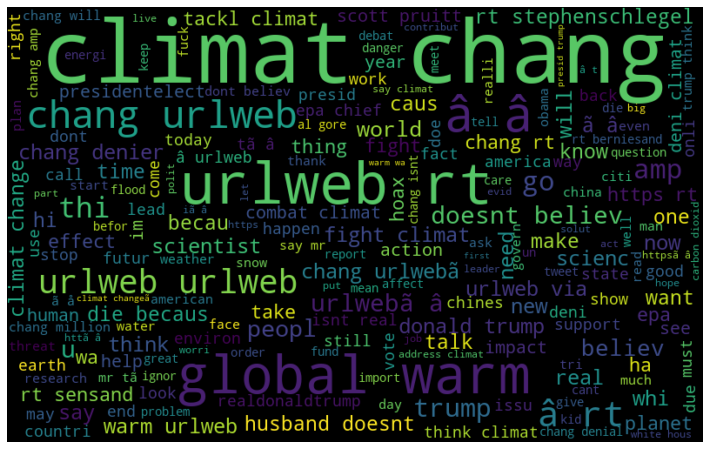

In [73]:
#visualize frequent words
all_words = " ".join([sentence for sentence in train_df["clean_tweet"]])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500,random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

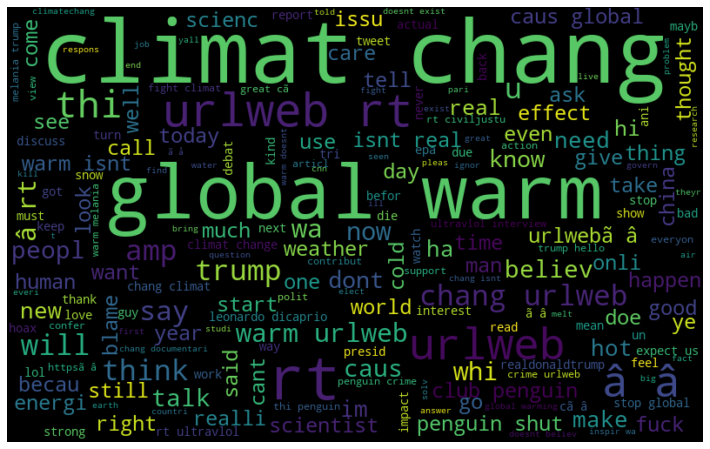

In [74]:
##frequent words neutral
all_words = " ".join([sentence for sentence in train_df["clean_tweet"][train_df["sentiment"]==0]])

wordcloud = WordCloud(width=800, height=500,random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

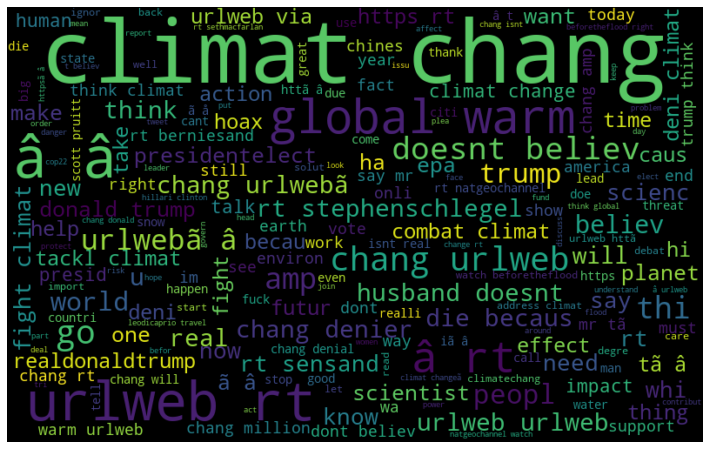

In [75]:
#frequent words positive
all_words = " ".join([sentence for sentence in train_df["clean_tweet"][train_df["sentiment"]==1]])

wordcloud = WordCloud(width=800, height=500,random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

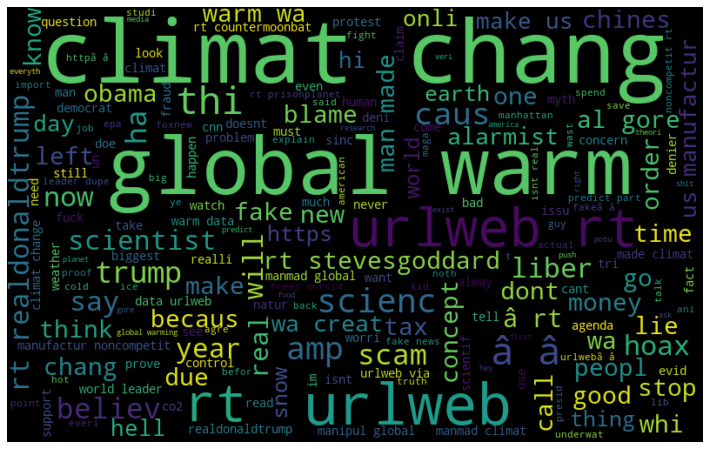

In [76]:
#frequent words negative
all_words = " ".join([sentence for sentence in train_df["clean_tweet"][train_df["sentiment"]==-1]])

wordcloud = WordCloud(width=800, height=500,random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

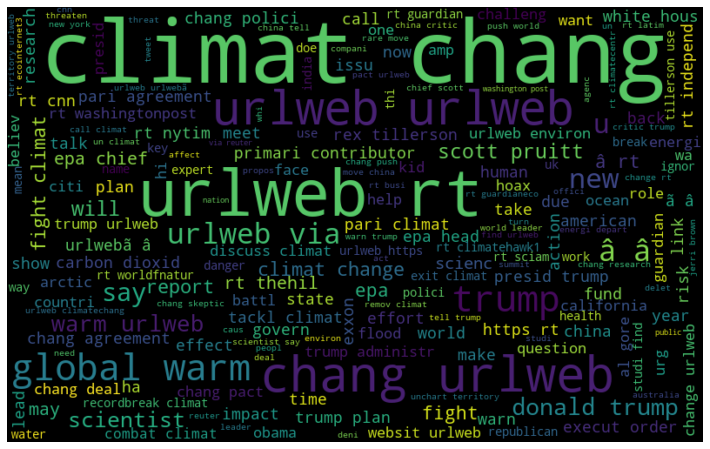

In [77]:
#frequent words factual
all_words = " ".join([sentence for sentence in train_df["clean_tweet"][train_df["sentiment"]==2]])

wordcloud = WordCloud(width=800, height=500,random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [48]:
#def freq_words(tokens):
  #'''See frequency distribution of words'''
#from nltk.probability import FreqDist
#fdist = FreqDist(message)
#print(fdist) # total 508935 values and 56653 unique values
    
  # top 20 most common words
#print("Top 10 most common words in the data. \n")
#df = pd.DataFrame(fdist.most_common(20), columns=['Tokens', 'Frequency'])
#print(df)

  # plot of top 20 most common words
#fdist.plot(20, cumulative = False)
#plt.show()

In [87]:
#### STOP WORDS
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [88]:
def remove_stop_words(tokens):    
    return [t for t in tokens if t not in stopwords.words('english')]

In [91]:
def bag_of_words_count(words, word_dict={}):
    """ this function takes in a list of words and returns a dictionary 
        with each word as a key, and the value represents the number of 
        times that word appeared"""
    for word in words:
        if word in word_dict.keys():
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    return word_dict

In [ ]:
sentiments = {}
for sent in type_sentiment:
    df = train_df.groupby('sentiment')
    sentiments[sent] = {} # make the personality type the main key
    for row in df.get_group(sent)['tokens']: # gets the pp group and its tokens
        sentiments[sent] = bag_of_words_count(row, sentiments[sent]) # gives bag of ords for each personality 